# IPL Exploratory Analysis (2008 - 2019)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')

# Loading the dataset

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
1,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
2,186,2010,Cuttack,2010-03-19,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Deccan Chargers,6,0,A Symonds,Barabati Stadium,BF Bowden,M Erasmus,NaN
3,189,2010,Cuttack,2010-03-21,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Deccan Chargers,10,0,A Symonds,Barabati Stadium,BF Bowden,M Erasmus,NaN
4,337,2012,Cuttack,2012-04-22,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,B Lee,Barabati Stadium,BF Bowden,SK Tarapore,NaN


The dataset contains the summary of all IPL matches played between 2008 and 2019. Also, we tinkered a bit with the dataset for the following reasons :
- In 2012, Deccan Chargers were replaced by Sunrisers Hyedrabad. We consider both as SRH
- Rising Pune Suoergiants dropped an 's' from their name for the 2017 season (they reached the final, though)
- Starting from 2019, Delhi Daredevils will be called Delhi Capitals now.

In [3]:
team_names=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

abbrs = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df.replace(team_names,abbrs,inplace = True)

df.drop(columns='umpire3', inplace=True)

## Total Number of Matches

In [4]:
tot_mat = len(df['id'])
print('The total number of matches played is ', tot_mat)

The total number of matches played is  756


## Matches Played per Season

In [5]:
mps = df['season'].value_counts().reset_index()
mps.columns = ['Season', 'Matches']
mps

,Season,Matches
0,2013,76
1,2012,74
2,2011,73
3,2019,60
4,2018,60
5,2016,60
6,2014,60
7,2010,60
8,2017,59
9,2015,59


### Let's plot the same 

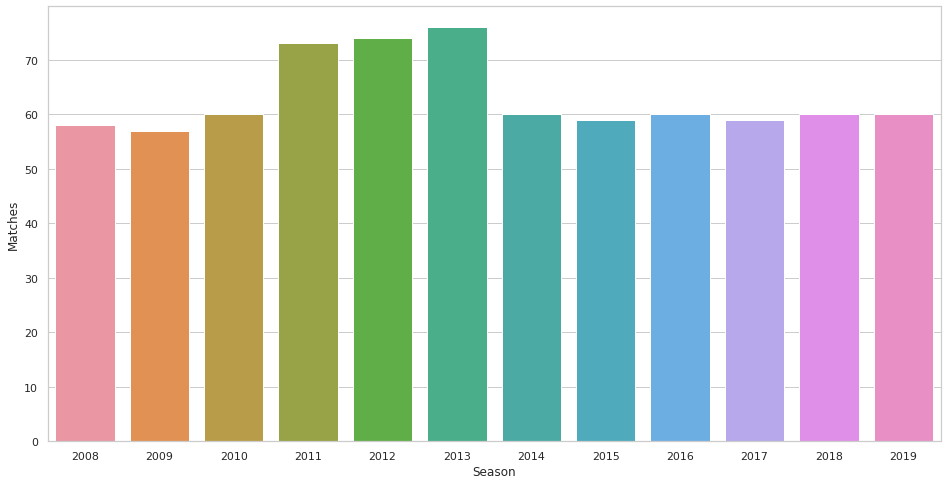

In [6]:
plt.figure(figsize=(16,8))
sns.barplot(x='Season', y='Matches', data=mps)

As we can see, the 2013 season had the most number of matches (76). And, all other seasons have had almost the same number of matches.

## Most Wins

In [7]:
teams = df['winner'].value_counts().reset_index()
teams.columns = ['Team', 'Wins']
teams

,Team,Wins
0,MI,109
1,CSK,100
2,KKR,92
3,SRH,87
4,RCB,84
5,KXIP,82
6,DC,77
7,RR,75
8,RPS,15
9,GL,13


### Let's plot it!

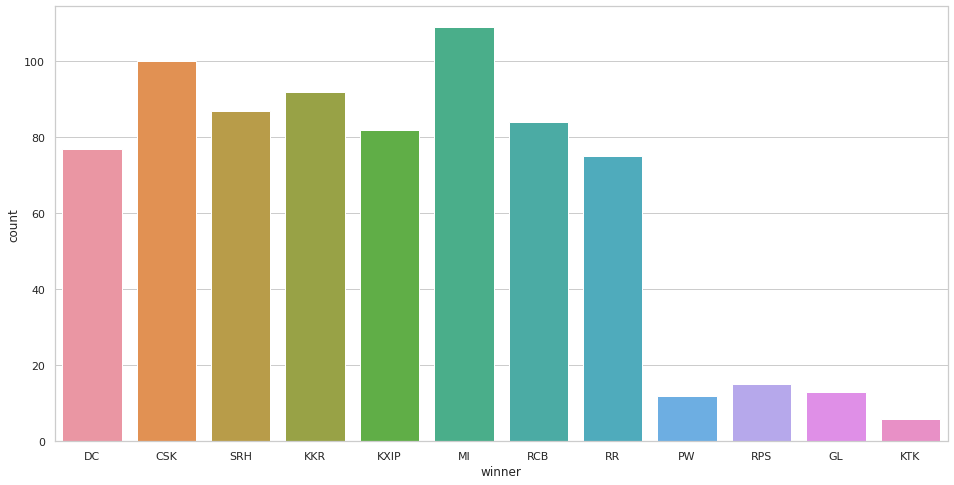

In [8]:
plt.figure(figsize=(16,8))
sns.countplot(df['winner'])

Mumbai Indians have the most number of wins (maybe because of playing more matches?), while Kochi Tuskers Kerala have the least.
Ofcourse, KTK only played in one season.
To see the bigger picture, let's have a look at the win percentage for each team.

## Highest Win Percentage

In [9]:
## Getting the number of matches each team played
played = pd.concat([df['team1'], df['team2']])
played = played.value_counts().reset_index()
played.columns = ['Team', 'Matches']
played

,Team,Matches
0,MI,187
1,SRH,183
2,RCB,180
3,KKR,178
4,DC,177
5,KXIP,176
6,CSK,164
7,RR,147
8,PW,46
9,RPS,30


In [10]:
## Merge the matches played and wins dataframes together
played = pd.merge(played, teams, on='Team')
played

,Team,Matches,Wins
0,MI,187,109
1,SRH,183,87
2,RCB,180,84
3,KKR,178,92
4,DC,177,77
5,KXIP,176,82
6,CSK,164,100
7,RR,147,75
8,PW,46,12
9,RPS,30,15


In [11]:
## Calculating the win percentage for each team
played['Win %'] = played['Wins']*100/played['Matches']
played.sort_values(by='Win %', ascending = False)

,Team,Matches,Wins,Win %
6,CSK,164,100,60.975610
0,MI,187,109,58.288770
3,KKR,178,92,51.685393
7,RR,147,75,51.020408
9,RPS,30,15,50.000000
1,SRH,183,87,47.540984
2,RCB,180,84,46.666667
5,KXIP,176,82,46.590909
4,DC,177,77,43.502825
10,GL,30,13,43.333333


### Wanna see how it looks on the graph?

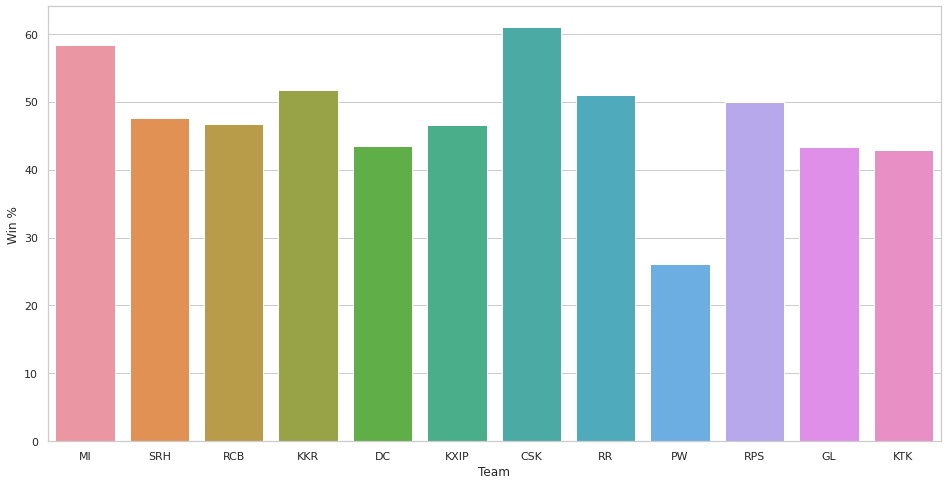

In [12]:
plt.figure(figsize=(16,8))
sns.barplot(x='Team', y='Win %', data=played)

#### So, our further analysis shows us that 
- Chennai Super Kings is the most successful team in the IPL (in terms of Win %, though).
- Also, Pune Warriors seem to have the lowest win percentage, a mere 26.
- Of the active IPL teams, Delhi Capitals have the lowest win percentage (43.5 %).

## Favourite Venues

In [13]:
## Let's see how many venues have hosted an IPL match
venues = df['venue'].value_counts().reset_index()
venues.columns = ['Venue', 'Matches']
print('A total of',len(venues),'venues to have organized an IPL match')

A total of 35 venues to have organized an IPL match


In [14]:
venues[:5]

,Venue,Matches
0,M Chinnaswamy Stadium,80
1,Eden Gardens,77
2,Feroz Shah Kotla,74
3,Wankhede Stadium,73
4,"Rajiv Gandhi International Stadium, Uppal",64


### You know, it will look good on the plot

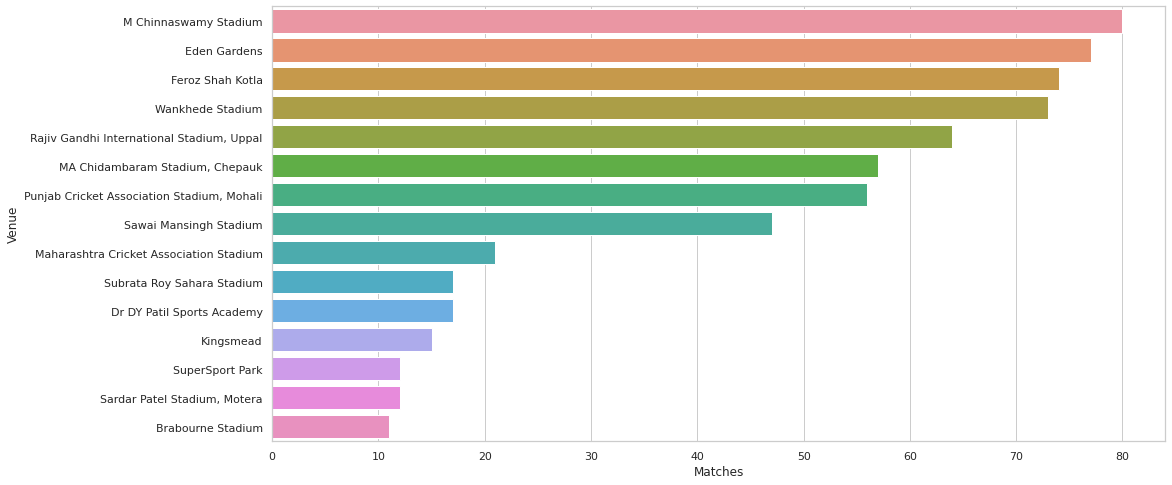

In [15]:
plt.figure(figsize=(16,8))
sns.barplot(x='Matches', y='Venue', data=venues[:15], orient='h')

So, the most loved venues are 
- **M Chinnaswamy**
- **Eden Gardens**
- **Feroz Shah Kotla**, and
- **Wankhede**

Obviously, they are the ones mostly used for hosting knock-out matches, because of their size, team popularity, and a number of various other factors.

## Most Popular Umpire

In [16]:
umps = pd.concat([df['umpire1'], df['umpire2']])
umps = umps.value_counts().reset_index()
umps.columns= ['Umpire', 'Matches']
umps

,Umpire,Matches
0,S Ravi,106
1,HDPK Dharmasena,87
2,C Shamshuddin,73
3,AK Chaudhary,58
4,SJA Taufel,55
...,...,...
70,Nanda Kishore,3
71,SD Ranade,2
72,Sundaram Ravi,1
73,Subroto Das,1


### Just Plot It!

[Text(0, 0, 'S Ravi'),
 Text(0, 0, 'HDPK Dharmasena'),
 Text(0, 0, 'C Shamshuddin'),
 Text(0, 0, 'AK Chaudhary'),
 Text(0, 0, 'SJA Taufel'),
 Text(0, 0, 'M Erasmus'),
 Text(0, 0, 'Asad Rauf'),
 Text(0, 0, 'Nitin Menon'),
 Text(0, 0, 'BR Doctrove'),
 Text(0, 0, 'RE Koertzen'),
 Text(0, 0, 'CK Nandan'),
 Text(0, 0, 'VA Kulkarni'),
 Text(0, 0, 'Aleem Dar'),
 Text(0, 0, 'RJ Tucker'),
 Text(0, 0, 'BF Bowden'),
 Text(0, 0, 'BNJ Oxenford'),
 Text(0, 0, 'SK Tarapore'),
 Text(0, 0, 'RB Tiffin'),
 Text(0, 0, 'S Asnani'),
 Text(0, 0, 'DJ Harper')]

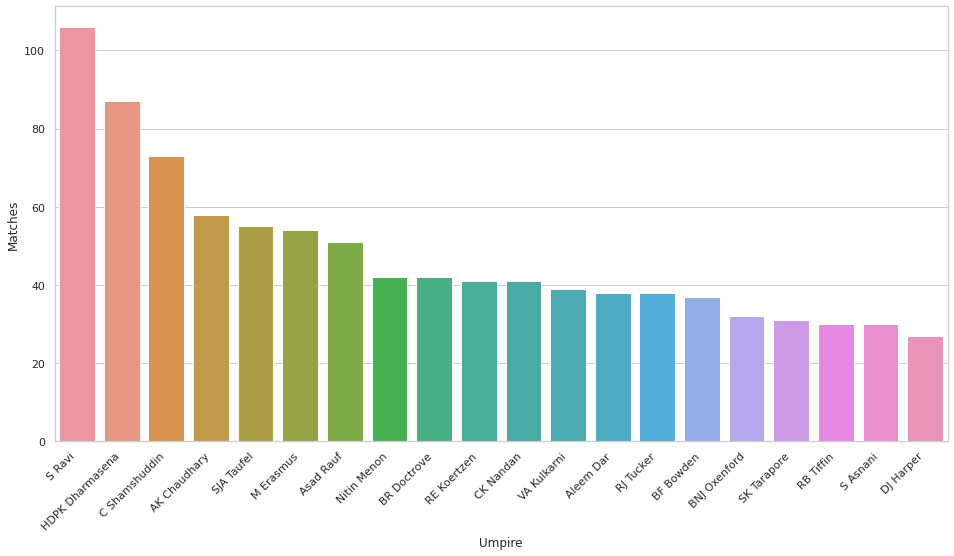

In [17]:
plt.figure(figsize=(16,8))
chart = sns.barplot(x='Umpire', y='Matches', data= umps[:20])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Looks like BCCI really loves S Ravi! He is the **only** umpire to stand in more than 100 matches
<br>Kumar Dharmasena, second on the list, is 19 matches short of S Ravi

## Most Player Of the Match Awards

In [18]:
poms = df['player_of_match'].value_counts().reset_index()
poms.columns = ['Player', 'Number of Awards']
poms[:10]

,Player,Number of Awards
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


### Plotting it makes kinda sense!

[Text(0, 0, 'CH Gayle'),
 Text(0, 0, 'AB de Villiers'),
 Text(0, 0, 'MS Dhoni'),
 Text(0, 0, 'RG Sharma'),
 Text(0, 0, 'DA Warner'),
 Text(0, 0, 'YK Pathan'),
 Text(0, 0, 'SR Watson'),
 Text(0, 0, 'SK Raina'),
 Text(0, 0, 'G Gambhir'),
 Text(0, 0, 'AM Rahane'),
 Text(0, 0, 'MEK Hussey'),
 Text(0, 0, 'V Kohli'),
 Text(0, 0, 'V Sehwag'),
 Text(0, 0, 'A Mishra'),
 Text(0, 0, 'DR Smith'),
 Text(0, 0, 'AD Russell'),
 Text(0, 0, 'KA Pollard'),
 Text(0, 0, 'JH Kallis'),
 Text(0, 0, 'AT Rayudu'),
 Text(0, 0, 'SE Marsh')]

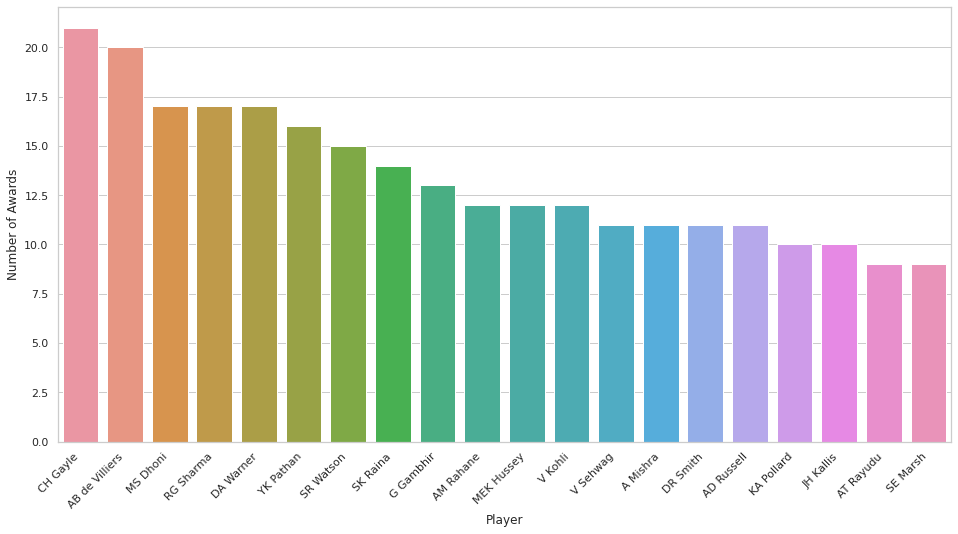

In [19]:
plt.figure(figsize=(16,8))
chart = sns.barplot(x='Player', y='Number of Awards', data= poms[:20])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

Looks like Chris Gayle and AB de Villiers are the best players of tournament. But, we'll look further into it some time later.

## Does Toss Actually Mater?   <font size = 2px> Believe me, it does! </font>

In [20]:
# Let's look at the luckiest teams with the coin
toss_wins = df['toss_winner'].value_counts().reset_index()
toss_wins.columns = ['Team', 'Toss Wins']
toss_wins

,Team,Toss Wins
0,MI,98
1,KKR,92
2,DC,90
3,SRH,89
4,CSK,89
5,KXIP,81
6,RCB,81
7,RR,80
8,PW,20
9,GL,15


### I'm out of words, let's just make a plot.

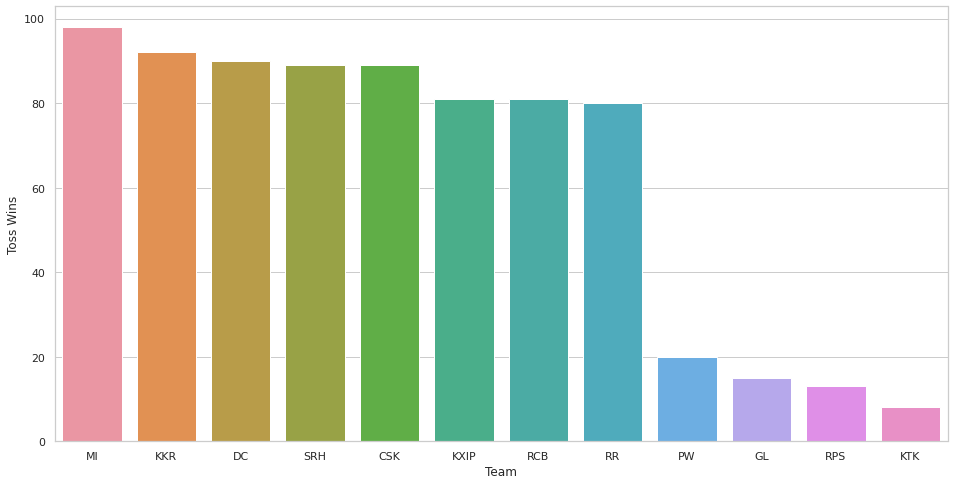

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x='Team', y='Toss Wins', data=toss_wins)

Well, MI have won the most number of tosses(99) but maybe it is due to playing more number of matches
<br> Let's check the toss win percentage and compare it with the win percentage for every team.

In [22]:
played = pd.merge(played,toss_wins, on='Team')
played['Toss Win %'] = played['Toss Wins']*100 / played['Matches']
played

,Team,Matches,Wins,Win %,Toss Wins,Toss Win %
0,MI,187,109,58.288770,98,52.406417
1,SRH,183,87,47.540984,89,48.633880
2,RCB,180,84,46.666667,81,45.000000
3,KKR,178,92,51.685393,92,51.685393
4,DC,177,77,43.502825,90,50.847458
5,KXIP,176,82,46.590909,81,46.022727
6,CSK,164,100,60.975610,89,54.268293
7,RR,147,75,51.020408,80,54.421769
8,PW,46,12,26.086957,20,43.478261
9,RPS,30,15,50.000000,13,43.333333


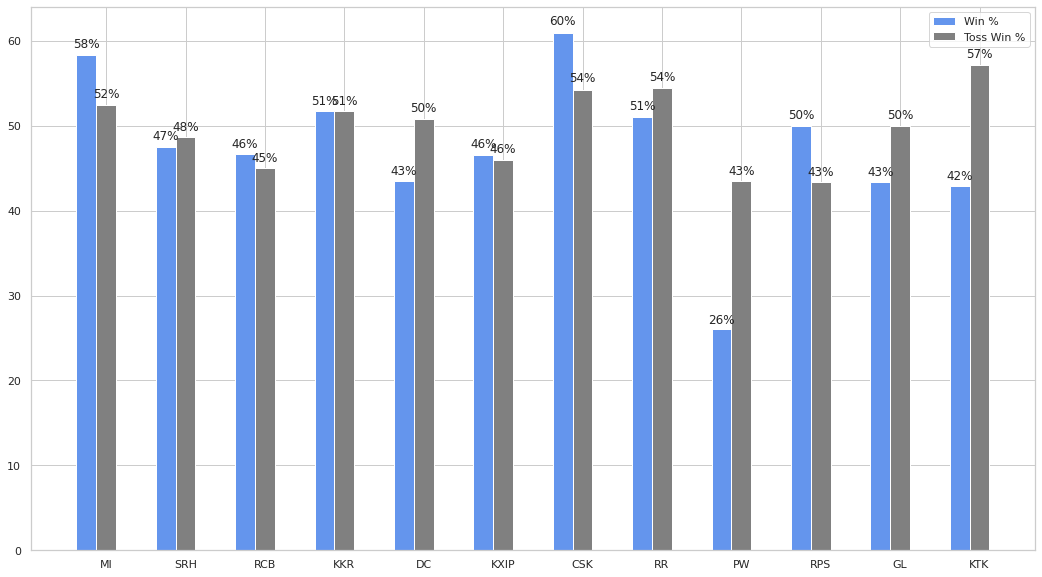

In [23]:
plt.figure(figsize=(18,10))

ax = plt.subplot(111)

ind = np.arange(12)
width = 0.25

yvals = played['Win %']
rects1 = ax.bar(ind, yvals, width, color='cornflowerblue')
zvals = played['Toss Win %']
rects2 = ax.bar(ind+width, zvals, width, color='gray')

ax.set_xticks(ind+width)
ax.set_xticklabels( (played['Team']) )

ax.legend( (rects1[0], rects2[0]), ('Win %', 'Toss Win %') )


def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d%%'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

- Mumbai Indians and Chennai Super Kings have the highest positive difference in Win % and Toss Win%. Stronger teams don't really, though.
- Pune Warriors (with the lowest win%) has the highest negative difference in Win% and Toss Win%. Even luck couldn't help them in winning.

([<matplotlib.patches.Wedge at 0x7fa65311da90>,
 [Text(-1.032089567977705, -0.38051428839347784, 'field'),
  Text(1.032089567977705, 0.38051428839347773, 'bat')],
 [Text(-0.5629579461696571, -0.20755324821462426, '61.2%'),
  Text(0.5629579461696571, 0.2075532482146242, '38.8%')])

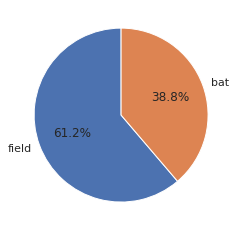

In [24]:
## Win the toss and ...?
toss_decisions = df['toss_decision'].value_counts().reset_index()
toss_decisions.columns = ['Decision', 'Matches']
plt.pie(toss_decisions['Matches'],
       labels=toss_decisions['Decision'],
       startangle=90,
       autopct='%1.1f%%')

WOW, 61% of the time teams chose to field first. That's kind of intuitive. Teams like to chase and they do chase better.

### Toss Win == Match Win?

In [25]:
both_winners = df[df['toss_winner'] == df['winner']]
win_per = len(both_winners['id'])*100/tot_mat
print(win_per,'%')

51.98412698412698 %


Just 52 % of toss wins have resulted in match wins. 

### Bat First or Bowl First?

In [26]:
bat_wins = len(df[df['win_by_runs']>0]['id'])
bowl_wins = len(df[df['win_by_wickets']>0]['id'])
print('Batting First Wins : ', bat_wins)
print('Batting Second Wins : ', bowl_wins)

Batting First Wins :  337
Batting Second Wins :  406


#### Yes, teams **do** chase better.

## Head to Heads

In [27]:
## We're gonna be creating some functions to apply
## to the dataframe and extract some information on
## how teams fare against each other

def add_teams(t1, t2):
    if(t1<t2):
        return t1+","+t2
    else:
        return t2+","+t1

    
# This function returns the count of wins of the 
# first team in the concatenated string of teams.
def team1_wins(vs, w):
    s = 0
    if(w==vs.split(',')[0]):
        s+=1
    return s

In [28]:
df['h2h'] = df.apply(lambda row: add_teams(row['team1'], row['team2']), axis=1)
h2h = df['h2h'].value_counts().reset_index()
h2h.columns = ['Rivalry', 'Meetings']
h2h[:10]

,Rivalry,Meetings
0,"CSK,MI",28
1,"KKR,SRH",26
2,"DC,SRH",26
3,"RCB,SRH",25
4,"MI,RCB",25
5,"KKR,KXIP",25
6,"KKR,MI",25
7,"DC,KXIP",24
8,"KKR,RCB",24
9,"DC,MI",24


So, CSK and MI have played the most number of times against each other. And surely, this comes from the fact that they have played each other in 4 finals, of which MI has won 3.

### Who has got the upper hand?

In [29]:
## Let's see which team has won most number of matches against another team
## and also the win percentage
df['t1wins'] = df.apply(lambda row: team1_wins(row['h2h'], row['winner']), axis=1)
wins = df.groupby('h2h')['t1wins'].sum().reset_index()
wins.columns = ['Rivalry', 'T1_Wins']
h2h = pd.merge(h2h, wins, on='Rivalry')
h2h.sort_values(by='T1_Wins', inplace=True, ascending = False)
h2h

,Rivalry,Meetings,T1_Wins
1,"KKR,SRH",26,17
5,"KKR,KXIP",25,17
4,"MI,RCB",25,16
20,"CSK,DC",21,15
16,"CSK,RCB",23,15
17,"CSK,SRH",22,15
8,"KKR,RCB",24,14
19,"CSK,RR",21,14
2,"DC,SRH",26,13
24,"CSK,KKR",20,13


On carefully examining the table, we can see that MI have really dominated against KKR.
<br> Of the 25 matches played between them, KKR managed to win only 6.

## Miscellaneous Stats

In [30]:
## Largest victory margin by runs
match_data = df[df['win_by_runs']== max(df['win_by_runs'])]
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,h2h,t1wins
142,44,2017,Delhi,2017-05-06,MI,DC,DC,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,"DC,MI",0


In [31]:
## Largest victory margin by wickets
match_data = df[df['win_by_wickets']== max(df['win_by_wickets'])]
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,h2h,t1wins
26,72,2008,Mumbai,2008-04-27,MI,SRH,SRH,field,normal,0,SRH,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,"MI,SRH",0
189,543,2015,Delhi,2015-04-26,DC,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,"DC,RCB",0
233,7941,2018,Indore,14/05/18,KXIP,RCB,RCB,field,normal,0,RCB,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,"KXIP,RCB",0
279,184,2010,Bangalore,2010-03-18,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,"RCB,RR",1
436,120,2009,Cape Town,2009-04-19,KXIP,DC,DC,field,normal,1,DC,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,"DC,KXIP",1
444,35,2017,Chandigarh,2017-04-30,DC,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association Stadium, Mohali",YC Barde,CK Nandan,"DC,KXIP",0
479,391,2013,Chandigarh,2013-04-10,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,"CSK,KXIP",1
568,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,"GL,KKR",0
574,591,2016,Rajkot,2016-04-21,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,"GL,SRH",0
602,377,2012,Jaipur,2012-05-20,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,"MI,RR",1
